In [43]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy.optimize import minimize
from sklearn.metrics import pairwise_distances
from scipy.misc import derivative
from sklearn.decomposition import PCA
import math
from numpy import linalg
%matplotlib inline

Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).



In [56]:
def cos_dist (data_1):
    result_1 = np.empty([10,2])
    for i in range(len(data_1)):
        test_cos =0
        fin_cos = 0
        pair_num = 0
        a = data_1[i]
        for j in range(len(data_1)):
            if j != i:
                b = data_1[j]
                test_cos = a.T.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))
                if test_cos > fin_cos or fin_cos == 0:
                    fin_cos = test_cos
                    pair_num = j
        result_1[i][0]=i
        result_1[i][1]=pair_num
    return result_1                

In [58]:
cos_dist(raitings) #наиболее похожие пользователи в массиве ниже

array([[0., 8.],
       [1., 4.],
       [2., 9.],
       [3., 9.],
       [4., 8.],
       [5., 9.],
       [6., 3.],
       [7., 5.],
       [8., 0.],
       [9., 2.]])

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [73]:
pca_1 = PCA(n_components=5)
pca_1.fit(raitings)
trans_fig = pca_1.transform(raitings)

In [74]:
trans_fig

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

С помощью собственных векторов, и использования матричного разложения к примеру с помощью техники Principal Component Analysis

Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [110]:
def f(x):
    return math.tan(math.sin(x) + math.cos(2*x+3))**2

In [112]:
derivative(f, 1.0, dx=1e-6, n=1) #производная

55.3859176464222

In [97]:
#На бумаге
x=1
2 * (math.sin (math.sin(x)+math.cos(2*x+3))/(math.cos(math.sin(x)+math.cos(2*x+3)))**3) * (math.cos(x)-2*math.sin(2*x+3))

55.385917635337854

2 * sin (sin(x)+cos(2*x+3))/cos(sin(x)+cos(2*x+3))**3 * (cos(x)+sin(2*x + 3)*2)

2 * sin (0.8414709848 + 0.28366218546) / cos (0.8414709848 + 0.28366218546)**3 * (0.54030230586 - 2 * −0.95892427466)

2 * 0.90232500598 / 0.43105635776**3 * 2.45815085518

In [104]:
2 * 0.90232500598 / 0.43105635776**3 * 2.45815085518

55.38591763257104

Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [3]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [4]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [5]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

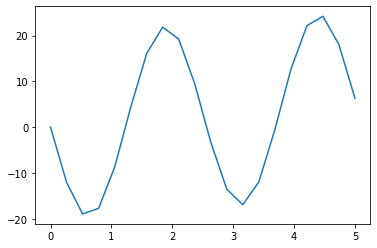

In [6]:
plt.plot(x, fx)
plt.show()

In [7]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [29]:
params_1 = np.array([0,0])
result = minimize(error, params_1, method='COBYLA', tol=1e-6)
result

     fun: 0.0010704233616394276
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 162
  status: 1
 success: True
       x: array([ 3.00000206, -2.5000014 ])

In [21]:
params_2 = np.array([3.00000206, -2.5000014])
error(params_2)

0.001071290062782282

In [30]:
print ('Оптимальные параметры a, b, минимизирующие абсолютную ошибку error, равны:', result.x )

Оптимальные параметры a, b, минимизирующие абсолютную ошибку error, равны: [ 3.00000206 -2.5000014 ]


Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [36]:
sample = np.random.randint(0, 20, 1000)
a1 = np.array([])

for i in range(1000):
    sample1 = np.random.choice(sample, size=50)
    a1 = np.append(a1, sample1.mean())

No handles with labels found to put in legend.


Text(0.5, 0, '$x$')

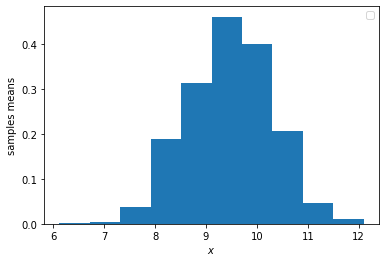

In [39]:
plt.hist(a1, density=True)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

m = np.array([[1, 4],
              [1, 1]])
print(m)

In [40]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [53]:
w, v = linalg.eig(m)
print ('Собственные числа:', w)
print ('Собственные вектора:', v)

Собственные числа: [ 3. -1.]
Собственные вектора: [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


In [55]:
np.dot(m,v)

array([[ 2.68328157,  0.89442719],
       [ 1.34164079, -0.4472136 ]])

In [60]:
w*v

array([[ 2.68328157,  0.89442719],
       [ 1.34164079, -0.4472136 ]])

Система уравнений 

1*x1 + 4 * x2 = l * x1  ###############   1*x1 + 1 * x2 = l * x2

x1 + 4 * x2 - l * x1 = 0 ###############   x1 + x2 - l * x2 = 0

(1-l)*x1 + 4 * x2 = 0 ############### x1 + (1-l) * x2 = 0

1-l   4     ###############   1    1-l     = 0

(1-l)*(1-l) - 4 = 0

1 - l - l + l**2 - 4 = 0

l**2 - 2*l - 3 = 0

l (l-2)= 3

l1 = 3, l2 = -1

In [ ]:
Подставляем l1 = 3

(1-l)*x1 + 4 * x2 = 0 ############### x1 + (1-l) * x2 = 0

-2 * x1 + 4 * x2 = 0  ############### x1 -2 * x2 = 0

x1 = 2*x2

Подставляем l2 = -1

(1-l)*x1 + 4 * x2 = 0 ############### x1 + (1-l) * x2 = 0

0*x1 + 4 * x2 = 0 ############### x1 + 0 * x2 = 0

x1 = 0 , x2 = 0 